In [100]:
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


pd.options.display.max_seq_items = 4000

train = []
valid = []

folder_path = './train'
train_list=sorted(os.listdir(folder_path))
for i in range (len(train_list)):
    file_path = os.path.join(folder_path, train_list[i])
    train.append(file_path)


folder_path_2 = './valid'
vaild_list=sorted(os.listdir(folder_path_2))
for i in range (len(vaild_list)):
    file_path = os.path.join(folder_path_2, vaild_list[i])
    valid.append(file_path)


train_annotations = pd.read_json('./train_annotations')
train_annotations

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0
...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0
496,496,496,1,"[229, 359, 144, 131]",18864,[],0
497,497,497,1,"[258, 183, 126, 323]",40698,[],0
498,498,498,1,"[140, 55, 336, 517]",173712,[],0


In [101]:
valid_annotations = pd.read_json('./valid_annotations')
valid_annotations

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[227, 93, 298, 525]",156450,[],0
1,1,1,2,"[211, 198, 428, 259]",110852,[],0
2,2,2,2,"[0, 243, 512, 267]",136704,[],0
3,3,3,1,"[128, 178, 457, 354]",161778,[],0
4,4,4,1,"[168, 131, 296, 469]",138824,[],0
...,...,...,...,...,...,...,...
67,67,67,2,"[198, 288, 273, 135]",36855,[],0
68,68,68,1,"[58, 225, 205, 283]",58015,[],0
69,69,69,1,"[162, 109, 351, 327]",114777,[],0
70,70,70,2,"[23, 87, 539, 454]",244706,[],0


In [102]:
train_annotations.drop(['id', 'segmentation', 'area'], axis = 1,inplace=True)
valid_annotations.drop(['id', 'segmentation', 'area'], axis = 1,inplace=True)

In [103]:
train_annotations.columns=['image','label', 'bbox', 'iscrowd']
valid_annotations.columns=['image','label', 'bbox', 'iscrowd']
#train_annotations['label']=train_annotations['label'].replace({1:'Penguin',2:'Turtle'})
#valid_annotations['label']=valid_annotations['label'].replace({1:'Penguin',2:'Turtle'})
train_annotations

,image,label,bbox,iscrowd
0,0,1,"[119, 25, 205, 606]",0
1,1,1,"[131, 82, 327, 440]",0
2,2,2,"[225, 298, 198, 185]",0
3,3,2,"[468, 109, 172, 193]",0
4,4,1,"[14, 242, 611, 154]",0
...,...,...,...,...
495,495,2,"[92, 203, 456, 230]",0
496,496,1,"[229, 359, 144, 131]",0
497,497,1,"[258, 183, 126, 323]",0
498,498,1,"[140, 55, 336, 517]",0


In [104]:
train_annotations['image']=train
train_df = train_annotations
train_df.head()

,image,label,bbox,iscrowd
0,./train/image_id_000.jpg,1,"[119, 25, 205, 606]",0
1,./train/image_id_001.jpg,1,"[131, 82, 327, 440]",0
2,./train/image_id_002.jpg,2,"[225, 298, 198, 185]",0
3,./train/image_id_003.jpg,2,"[468, 109, 172, 193]",0
4,./train/image_id_004.jpg,1,"[14, 242, 611, 154]",0


In [105]:
valid_annotations['image']=valid
valid_df = valid_annotations
valid_df.head()

,image,label,bbox,iscrowd
0,./valid/image_id_000.jpg,1,"[227, 93, 298, 525]",0
1,./valid/image_id_001.jpg,2,"[211, 198, 428, 259]",0
2,./valid/image_id_002.jpg,2,"[0, 243, 512, 267]",0
3,./valid/image_id_003.jpg,1,"[128, 178, 457, 354]",0
4,./valid/image_id_004.jpg,1,"[168, 131, 296, 469]",0


In [106]:
imgs = []
labels = []
fpath = []

def read_img(train_df,num):
    img_path=[]
    all_labels=[]
    img_path = train_df['image']
    all_labels = train_df['label']
    for i in range(0,num):       
        
        img = cv2.imread(img_path[i])
        img = cv2.resize(img, (224, 224)) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)                      
        labels.append(all_labels[i])
        fpath.append(img_path[i]) 

              
    return np.asarray(fpath, np.string_), np.asarray(imgs, np.float32), np.asarray(labels, np.int32)

fpaths, data, label = read_img(train_df,500)

print(data.shape)  
num_classes = len(set(fpath))
print(num_classes)

num_example = data.shape[0]
arr = np.arange(num_example)
np.random.shuffle(arr)
data = data[arr]
label = label[arr]
fpaths = fpaths[arr]

(500, 224, 224, 3)
500


In [107]:
test_imgs = []
test_labels = []
test_fpath = []

def read_img(valid_df):
    val_img_path=[]
    val_all_labels=[]
    val_img_path = valid_df['image']
    val_all_labels = valid_df['label']
    for i in range(0,72):       
        
        val_img = cv2.imread(val_img_path[i])
        val_img = cv2.resize(val_img, (224, 224)) 
        val_img = cv2.cvtColor(val_img, cv2.COLOR_BGR2RGB)
        test_imgs.append(val_img)                      
        test_labels.append(val_all_labels[i])
        test_fpath.append(val_img_path[i]) 

              
    return np.asarray(test_fpath, np.string_), np.asarray(test_imgs, np.float32), np.asarray(test_labels, np.int32)

val_fpaths, val_data, val_label = read_img(valid_df)

print(val_data.shape)  
val_num_classes = len(set(val_fpaths))
print(val_num_classes)

num_example = val_data.shape[0]
arr = np.arange(num_example)
np.random.shuffle(arr)
val_data = val_data[arr]
val_label = val_label[arr]
val_fpaths = val_fpaths[arr]

(72, 224, 224, 3)
72


In [108]:
x_train = data
y_train = label
fpaths_train = fpaths
x_val = val_data
y_val = val_label
fpaths_test = val_fpaths
print(len(x_train),len(y_train),len(x_val),len(y_val)) #800 800 200 200
print(y_val)

xs = tf.placeholder(tf.float32, [None, 224, 224, 3])  
ys = tf.placeholder(tf.int32, [None])             
 
drop = tf.placeholder(tf.float32)                

# defination Placeholder 1
conv0 = tf.layers.conv2d(xs, 32, 3, activation=tf.nn.relu)    
# defination pooling
pool0 = tf.layers.max_pooling2d(conv0, [2, 2], [2, 2])      
print("Layer0：\n", conv0, pool0)
 
# defination convolutional layer
conv1 = tf.layers.conv2d(pool0, 32, 5, activation=tf.nn.relu) 
# defination pooling
pool1 = tf.layers.max_pooling2d(conv1, [2, 2], [2, 2])       
print("Layer1：\n", conv1, pool1)

# defination convolutional layer
conv2 = tf.layers.conv2d(pool1, 64, 3, activation=tf.nn.relu) 
# defination pooling
pool2 = tf.layers.max_pooling2d(conv2, [2, 2], [2, 2])  

# defination convolutional layer
conv3 = tf.layers.conv2d(pool2, 128, 3, activation=tf.nn.relu) 
# defination pooling
pool3 = tf.layers.max_pooling2d(conv3, [2, 2], [2, 2])  

flatten = tf.layers.flatten(pool3)

#fully connected layer
fc = tf.layers.dense(flatten, 400, activation=tf.nn.relu)
print("Layer2：\n", fc)

# DropOut
dropout_fc = tf.layers.dropout(fc, drop)

logits = tf.layers.dense(dropout_fc, num_classes)


predicted_labels = tf.arg_max(logits, 1)


losses = tf.nn.softmax_cross_entropy_with_logits(
        labels = tf.one_hot(ys, num_classes),       
        logits = logits)

# Mean loss
mean_loss = tf.reduce_mean(losses)

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(losses)


500 500 72 72
[2 2 1 2 2 1 2 2 1 1 2 2 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2
 1 2 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1]
Layer0：
 Tensor("conv2d_12/Relu:0", shape=(?, 222, 222, 32), dtype=float32) Tensor("max_pooling2d_12/MaxPool:0", shape=(?, 111, 111, 32), dtype=float32)
Layer1：
 Tensor("conv2d_13/Relu:0", shape=(?, 107, 107, 32), dtype=float32) Tensor("max_pooling2d_13/MaxPool:0", shape=(?, 53, 53, 32), dtype=float32)
Layer2：
 Tensor("dense_10/Relu:0", shape=(?, 400), dtype=float32)


/var/folders/hp/yc03shb16jlfkv95l6glc31h0000gn/T/ipykernel_15676/2634769292.py:16: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv0 = tf.layers.conv2d(xs, 32, 3, activation=tf.nn.relu)
/var/folders/hp/yc03shb16jlfkv95l6glc31h0000gn/T/ipykernel_15676/2634769292.py:18: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  pool0 = tf.layers.max_pooling2d(conv0, [2, 2], [2, 2])
/var/folders/hp/yc03shb16jlfkv95l6glc31h0000gn/T/ipykernel_15676/2634769292.py:22: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv1 = tf.layers.conv2d(pool0, 32, 5, activation=tf.nn.relu)
/var/folders/hp/yc03shb16jlfkv95l6glc31h0000gn/T/ipykernel_15676/2634769292.py:24: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a

In [109]:
saver = tf.train.Saver()
train = False
model_path = "./model/image_model.ckpt"
print("Saving Model:{}".format(model_path))
train_pre = None
with tf.Session() as sess:
        print("Training")
        sess.run(tf.global_variables_initializer())
        train_feed_dict = {
                xs: x_train,
                ys: y_train,
                drop: 0.25
        }
        for step in range(50):
            _, mean_loss_val = sess.run([optimizer, mean_loss], feed_dict=train_feed_dict)
            if step % 10 == 0:  
                pre = sess.run(predicted_labels, feed_dict=train_feed_dict)
                accuracy = 1.0*sum(y_train==pre) / len(pre)
                print("{},{},{}".format(step, mean_loss_val,accuracy))
        saver.save(sess, model_path)
        train_pre = sess.run(predicted_labels, feed_dict=train_feed_dict)
        print("Finished, saving model{}".format(model_path))

        print("Test")
        saver.restore(sess, model_path)
        label_name_dict = {
            1: "Penguin",
            2: "Turtle",
        
        }
        
        test_feed_dict = {
            xs: x_val,
            ys: y_val,
            drop: 0
        }
        
        # Compare
        predicted_labels_val = sess.run(predicted_labels, feed_dict=test_feed_dict)
        for fpath, real_label, predicted_label in zip(fpaths_test, y_val, predicted_labels_val):
            
            real_label_name = label_name_dict[real_label]
            predicted_label_name = label_name_dict[predicted_label]
            print("{}\t{} => {}".format(fpath, real_label_name, predicted_label_name))

        print("Number of Correct", sum(y_val==predicted_labels_val))
        print("Accuracy", 1.0*sum(y_val==predicted_labels_val) / len(y_val))

Saving Model:./model/image_model.ckpt
Training
0,47.226722717285156,0.498
10,4.111522197723389,0.508
20,0.757881224155426,0.732
30,0.7052236795425415,0.866
40,0.22501446306705475,0.888
Finished, saving model./model/image_model.ckpt
Test
INFO:tensorflow:Restoring parameters from ./model/image_model.ckpt
b'./valid/image_id_006.jpg'	Turtle => Turtle
b'./valid/image_id_065.jpg'	Turtle => Penguin
b'./valid/image_id_025.jpg'	Penguin => Penguin
b'./valid/image_id_013.jpg'	Turtle => Turtle
b'./valid/image_id_052.jpg'	Turtle => Turtle
b'./valid/image_id_063.jpg'	Penguin => Turtle
b'./valid/image_id_039.jpg'	Turtle => Turtle
b'./valid/image_id_071.jpg'	Turtle => Penguin
b'./valid/image_id_062.jpg'	Penguin => Penguin
b'./valid/image_id_037.jpg'	Penguin => Turtle
b'./valid/image_id_016.jpg'	Turtle => Turtle
b'./valid/image_id_031.jpg'	Turtle => Turtle
b'./valid/image_id_011.jpg'	Turtle => Turtle
b'./valid/image_id_048.jpg'	Penguin => Penguin
b'./valid/image_id_032.jpg'	Penguin => Penguin
b'./valid

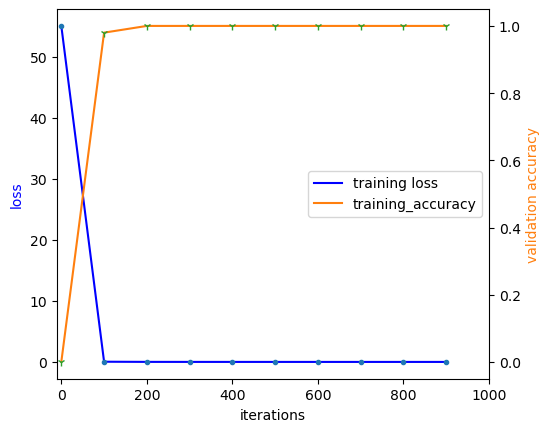

In [75]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

# 读取文件数据


# 迭代次数 整体误差 正确率
train_iterations = [0,100,200,300,400,500,600,700,800,900]
train_loss = [55.1054801940918,0.033213578164577484,0.007479098159819841,0.0036688975524157286,0.002080747624859214,
0.0012738509103655815,0.0008550945203751326,0.000586132809985429,0.0004321626911405474,0.00033044206793420017]
test_accuracy = [0.0,0.98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]



# 绘制曲线图
host = host_subplot(111)
plt.subplots_adjust(right=0.8) # ajust the right boundary of the plot window
par1 = host.twinx()

# 设置类标
host.set_xlabel("iterations")
host.set_ylabel("loss")
par1.set_ylabel("validation accuracy")

# 绘制曲线
p1, = host.plot(train_iterations, train_loss, "b-", label="training loss")
p2, = host.plot(train_iterations, train_loss, ".") #曲线点
p3, = par1.plot(train_iterations, test_accuracy, label="training_accuracy")
p4, = par1.plot(train_iterations, test_accuracy, "1")

# 设置图标
# 1->rightup corner, 2->leftup corner, 3->leftdown corner
# 4->rightdown corner, 5->rightmid ...
host.legend(loc=5)

# 设置颜色
host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p3.get_color())

# 设置范围
host.set_xlim([-10, 1000])

plt.draw()
plt.show()

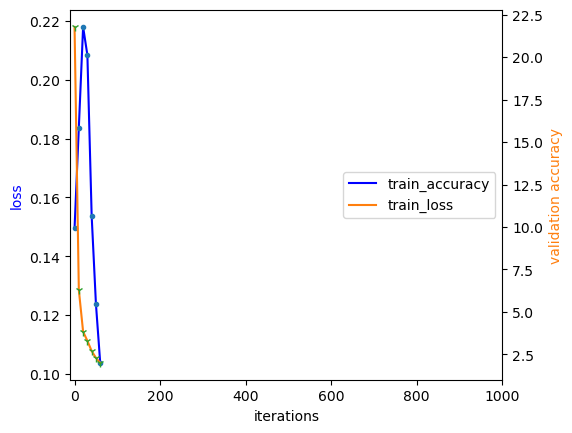

In [62]:
train_iterations_1 = [0,10,20,30,40,50,60]
train_loss_1 = [21.773832321166992,6.2950968742370605,3.841334581375122,3.302510976791382,
2.702510976791382,2.302510976791382,2.002510976791382
]
test_accuracy_1 = [0.149534989027831,0.18370545821867706,0.2179455919746421,0.20836671427078615,0.15370545821867706,0.12370545821867706,0.10370545821867706]

# 绘制曲线图
host = host_subplot(111)
plt.subplots_adjust(right=0.8) # ajust the right boundary of the plot window
par1 = host.twinx()

# 设置类标
host.set_xlabel("iterations")
host.set_ylabel("loss")
par1.set_ylabel("validation accuracy")

# 绘制曲线
p1, = host.plot(train_iterations_1, test_accuracy_1, "b-", label="train_accuracy")
p2, = host.plot(train_iterations_1, test_accuracy_1, ".") #曲线点
p3, = par1.plot(train_iterations_1, train_loss_1, label="train_loss")
p4, = par1.plot(train_iterations_1, train_loss_1, "1")

# 设置图标
# 1->rightup corner, 2->leftup corner, 3->leftdown corner
# 4->rightdown corner, 5->rightmid ...
host.legend(loc=5)

# 设置颜色
host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p3.get_color())

# 设置范围
host.set_xlim([-10, 1000])

plt.draw()
plt.show()

In [110]:
import sklearn.metrics as metrics
print('Accuracy: ',metrics.accuracy_score(y_val,predicted_labels_val))
print('Precision : ',metrics.precision_score(y_val,predicted_labels_val))
print('F1 Score: ',metrics.f1_score(y_val,predicted_labels_val))
print('Recall: ',metrics.recall_score(y_val,predicted_labels_val))
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_val,predicted_labels_val))




Accuracy:  0.6805555555555556
Precision :  0.7407407407407407
F1 Score:  0.634920634920635
Recall:  0.5555555555555556
Confusion Matrix: 
[[20 16]
 [ 7 29]]


[[250   0]
 [  0 250]]


Text(47.25, 0.5, 'true')

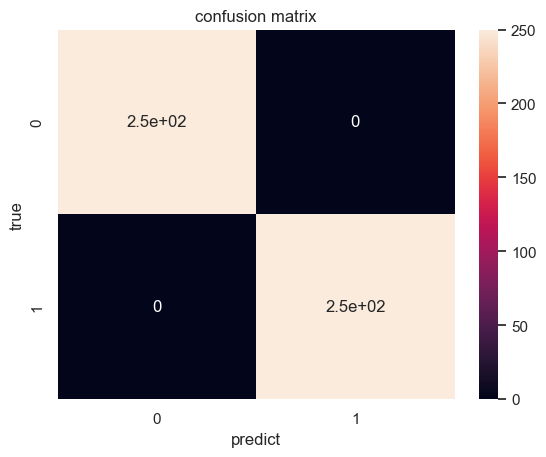

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(train_pre,y_train, labels=[1,2])
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,ax=ax) #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') 